In [54]:
%run functions.py

In [55]:
table = 'bigquery-public-data.crypto_ethereum.balances'

In [56]:
df = load_data_from_bigquery(table)

In [57]:
pipe, results = data_pipeline(df)

In [62]:
cl = cluster(results, n_clusters=8)

In [24]:
assign_cluster_to_data(df, dflabel, cl)

NameError: name 'dflabel' is not defined

In [63]:
tsne_results = calc_tsne(results, perplexity=50,n_iter=2000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.096s...
[t-SNE] Computed neighbors for 10000 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.730568
[t-SNE] KL divergence after 2000 iterations: 0.269348
t-SNE done! Time elapsed

In [26]:
range_n_clusters = [8]
sils = silhouette_plotter(results, range_n_clusters, tsne_results)

NameError: name 'silhouette_plotter' is not defined

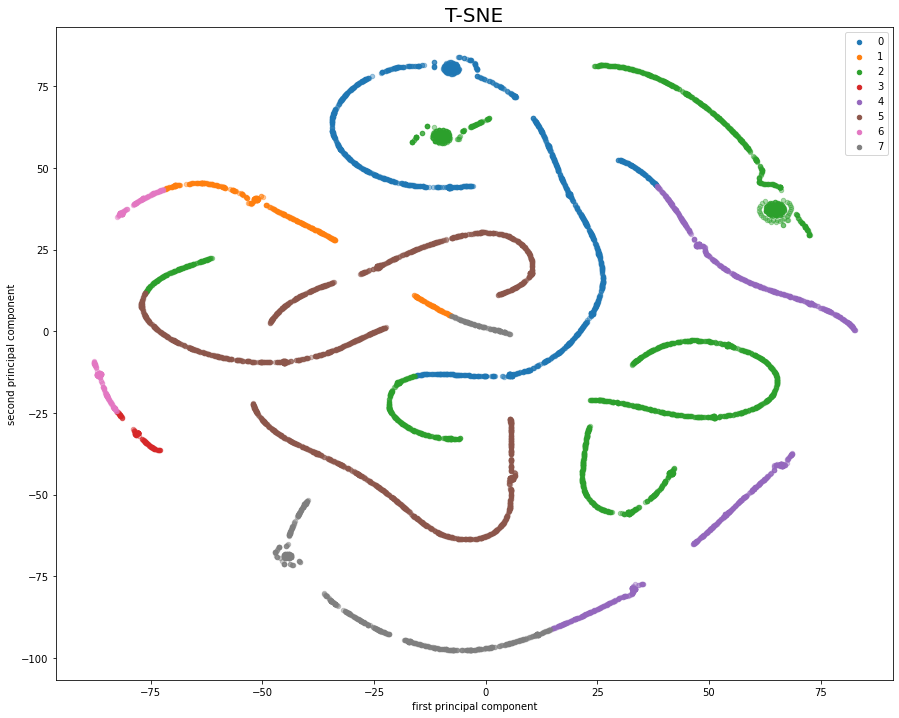

In [64]:
plot_tsne(cl, tsne_results)

In [28]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining', 'ICO Wallets')
colors = ('green', 'blue', 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl,dflabel, category=c)

clusters= list(d.values())

NameError: name 'dflabel' is not defined

In [29]:
plot_tsne_with_labeled_clusters(tsne_results, cl, clusters, categs, colors)

NameError: name 'clusters' is not defined

In [30]:
plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors)

NameError: name 'dflabel' is not defined

In [31]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')#, 'ICO Wallets')
colors = ('green', 'blue')#, 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl,dflabel, category=c)

clusters= list(d.values())

NameError: name 'dflabel' is not defined

In [60]:
#recluster with only clusters of interest - will help with separation
subpipe, subcl, subresults, newdf = recluster(df, cl, clusters, n_clusters=2)

In [61]:
sub_tsne_results = calc_tsne(subresults,n_iter=1000)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 710 samples in 0.001s...
[t-SNE] Computed neighbors for 710 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 710 / 710
[t-SNE] Mean sigma: 1.180153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.792526
[t-SNE] KL divergence after 1000 iterations: 0.873940
t-SNE done! Time elapsed: 3.0069594383239746 seconds


In [62]:
assign_cluster_to_data(newdf, dflabel, subcl)

In [63]:
#highlighting clusters of interest

d = {}
for c in categs:
    d[c] = find_category_of_cluster(subcl,dflabel, category=c)

subclusters= list(d.values())

Exchange
cluster number   0   number of type found: 3    cluster size: 400   label density: 0.0075
cluster number   1   number of type found: 42    cluster size: 310   label density: 0.13548387096774195
Mining
cluster number   0   number of type found: 9    cluster size: 400   label density: 0.0225
cluster number   1   number of type found: 2    cluster size: 310   label density: 0.0064516129032258064


/home/ubuntu/ethereum_clustering/functions.py:100: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


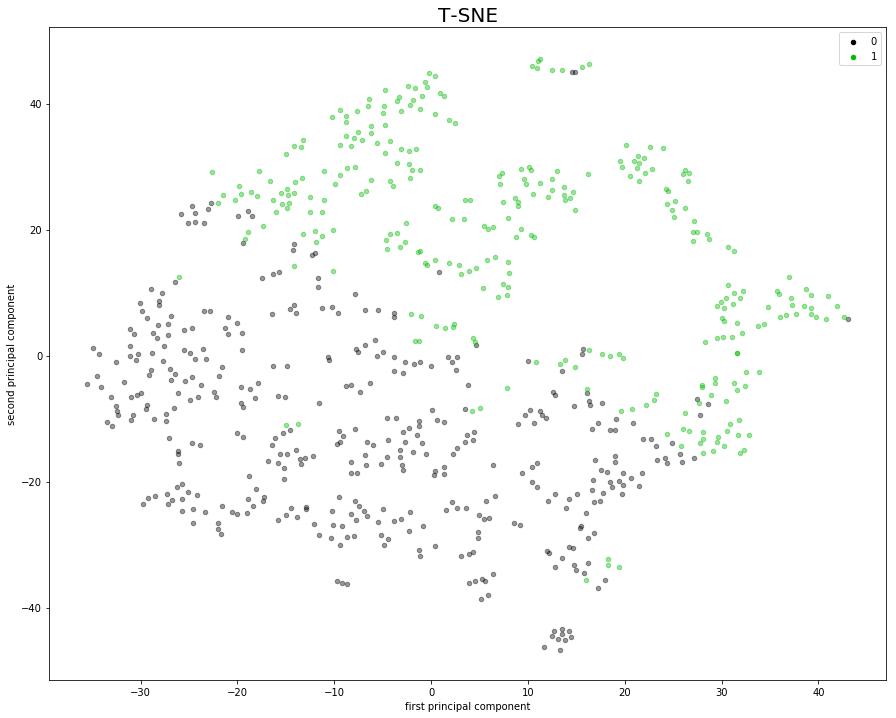

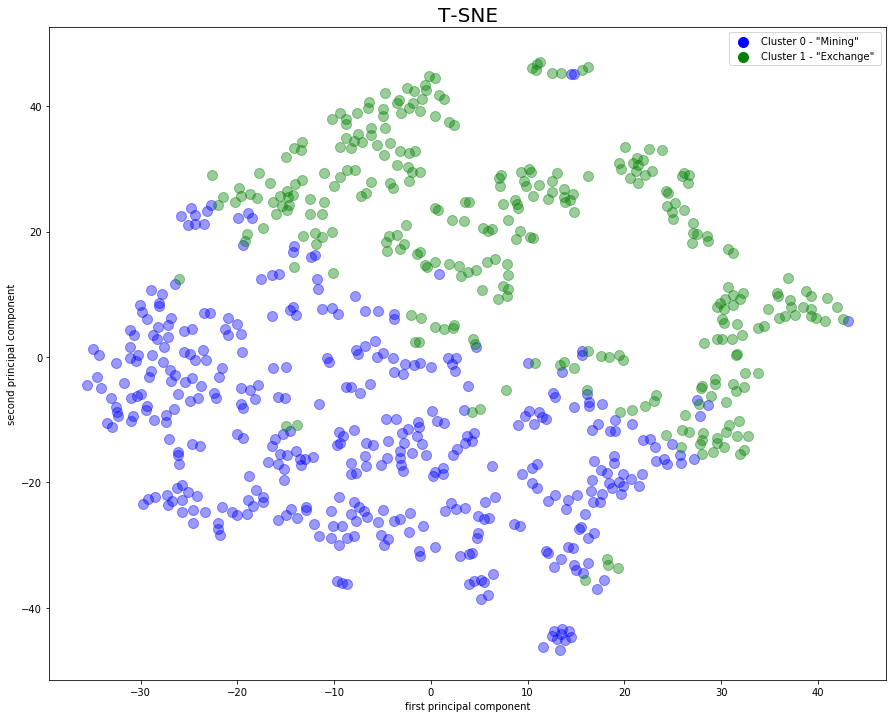

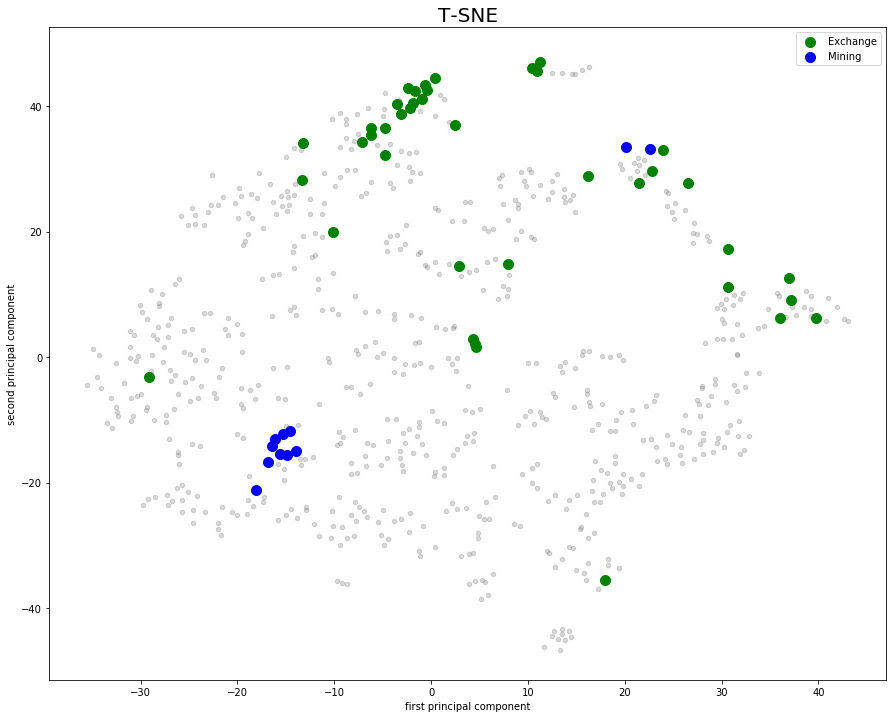

In [64]:
plot_all(sub_tsne_results,subcl,newdf,dflabel,subclusters,categs,colors )


In [65]:
mask = (cl.labels_==999)
for c in clusters:
    mask |= (cl.labels_==c)
np.sum(mask)

710

In [66]:
import copy

In [67]:
lbls = copy.deepcopy(cl.labels_)

In [68]:
lbls[mask] =  [100+subcl.labels_[i] for i in range(len(subcl.labels_))]

In [69]:
lbls

array([  2,   6,   1, ...,   6,   6, 101], dtype=int32)

In [70]:
clnew = copy.deepcopy(cl)

In [71]:
clnew.labels_=lbls

In [72]:
mask = np.array([c not in clusters for c in np.unique(cl.labels_) ])
clnew.cluster_centers_ = clnew.cluster_centers_[mask]

In [73]:
clnew.n_clusters=cl.n_clusters - len(np.unique(clusters)) + subcl.n_clusters

In [74]:
clnew.cluster_centers_ = np.vstack((clnew.cluster_centers_, subcl.cluster_centers_))

In [75]:
assign_cluster_to_data(df, dflabel, clnew)

In [76]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining', 'ICO Wallets')
colors = ('green', 'blue', 'orange')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(clnew,dflabel, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 10570   label density: 0.0
cluster number   1   number of type found: 2    cluster size: 4150   label density: 0.00048192771084337347
cluster number   2   number of type found: 0    cluster size: 4732   label density: 0.0
cluster number   4   number of type found: 0    cluster size: 10653   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 927   label density: 0.0
cluster number   6   number of type found: 1    cluster size: 3778   label density: 0.00026469031233456857
cluster number   7   number of type found: 5    cluster size: 397   label density: 0.012594458438287154
cluster number   100   number of type found: 3    cluster size: 400   label density: 0.0075
cluster number   101   number of type found: 42    cluster size: 310   label density: 0.13548387096774195
Mining
cluster number   0   number of type found: 0    cluster size: 10570   label density: 0.0
cluster number   1   numbe

In [77]:
for clust in np.unique(clnew.labels_):
    print('cluster {}'.format(clust))
    print('labelled points: {}'.format(np.sum([dflabel['cluster']==clust])))
    print('total points: {}'.format(np.sum(cl.labels_==clust)))
    print(dflabel[dflabel['cluster']==clust][['label','category']])
    print('\n\n\n')

cluster 0
labelled points: 1
total points: 10570
               label    category
24  Fake_Phishing700  Phish/Hack




cluster 1
labelled points: 29
total points: 4150
                          label               category
2                 Rate3_Wallet2            ICO Wallets
6                 Coinrail_Hack                  Heist
7                 Coinrail_Hack             Phish/Hack
8             Fake_Phishing1431             Phish/Hack
14             Perlin_TokenSale             Token Sale
17              Airbloc_Wallet2            ICO Wallets
18                Rate3_Wallet1            ICO Wallets
28                Dether_Wallet            ICO Wallets
31          Lendingblock_Wallet            ICO Wallets
35                 Zebi_Wallet2            ICO Wallets
37         Fake_MetadiumPresale                  Heist
40             Trade.io_Wallet2            ICO Wallets
47               CPChain_Wallet            ICO Wallets
60               Atlant_Wallet2            ICO Wallets
62     

/home/ubuntu/ethereum_clustering/functions.py:100: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


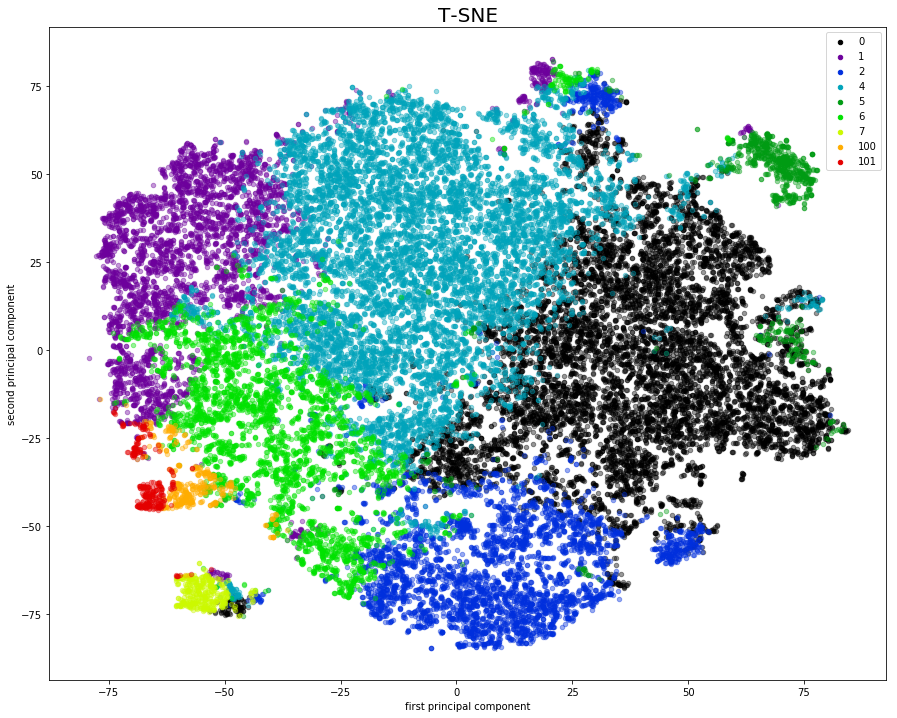

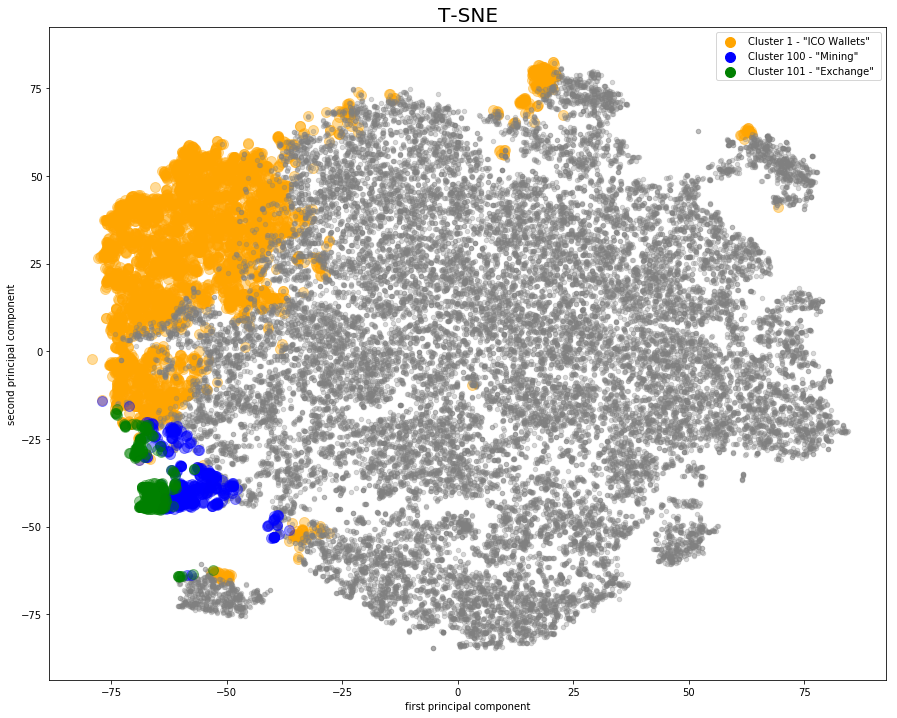

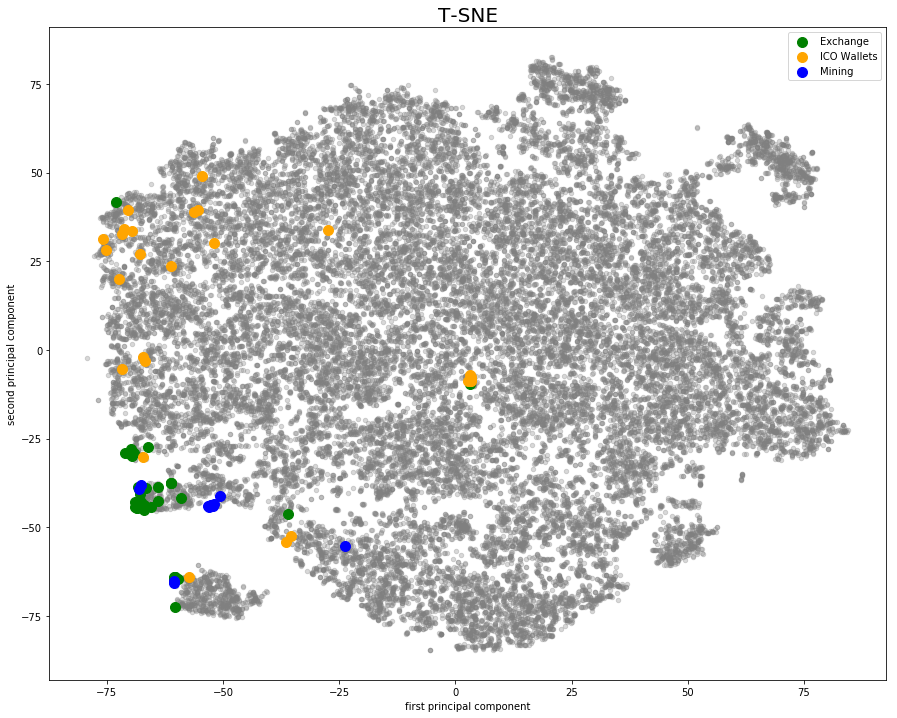

In [78]:
plot_all(tsne_results,clnew,df,dflabel,clusters,categs,colors )

In [79]:
#original cluster
pca = pipe.named_steps['PCA']
scale =pipe.named_steps['scale']
log = pipe.named_steps['log']
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
maindf_summary = pd.DataFrame(centroids, columns = df.columns[1:], index=np.unique(cl.labels_))

In [80]:
#subcluster
pca = subpipe.named_steps['PCA']
scale =subpipe.named_steps['scale']
log = subpipe.named_steps['log']
c = subcl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
subdf_summary = pd.DataFrame(centroids, columns = df.columns[1:], index=np.unique(subcl.labels_)+100)

In [81]:
dfsummary = pd.concat((maindf_summary[mask], subdf_summary), axis=0)

In [82]:
dfsummary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
0,7.076342,9.799170,23.132883,3.814353,8.709742e+03,1284.102539,105.241742,11.439569,3.079417e+04,3223.280701,...,7.486056,2.124769e+03,0.008517,0.020874,1.581267e+06,2.277777e+06,1.905131e+06,2.508514e+06,11.673853,69.184550
1,16.705794,19.170321,4021.831396,248.887793,1.671981e+06,103157.679659,6079.873128,329.608474,1.923413e+06,103894.253069,...,465.448903,1.469757e+05,0.006886,0.021332,6.344932e+05,1.143255e+06,1.037757e+06,1.668461e+06,15.126243,766.539638
2,10.922637,167.336320,49.598236,5.309813,2.060551e+04,1951.796638,141.254943,1.224849,4.901279e+04,298.985664,...,10.654336,3.601845e+03,0.006739,0.012923,9.258752e+04,8.447236e+04,1.431402e+06,1.812082e+06,9.897823,70.239501
4,10.131347,11.422883,270.418856,27.889034,1.169501e+05,11860.148445,492.328926,44.725116,1.409067e+05,12654.466003,...,32.789417,9.297082e+03,0.004584,0.011945,1.413218e+06,2.215685e+06,1.768574e+06,2.573729e+06,13.682807,154.253133
5,5.084728,8.848053,23.576924,6.552525,5.891108e+03,1332.700011,191.536119,23.704531,5.684290e+04,6676.064819,...,15.311840,4.360387e+03,0.005248,0.014132,3.498792e+05,5.079626e+05,2.533558e+03,1.932022e+03,8.910015,125.775850
6,44.495261,75.398970,872.750651,21.074125,3.666331e+05,8397.677371,1079.444526,15.519268,4.461425e+05,6022.988836,...,110.434310,4.540021e+04,0.002018,0.005547,1.829523e+05,3.425476e+05,3.529834e+05,6.438256e+05,11.874501,118.872016
7,64.881652,43.103116,688.361270,13.760467,1.849429e+05,2995.918198,645.561318,18.203168,1.414043e+05,3448.529507,...,44.590892,8.820194e+03,5.291483,164.720305,6.003306e+05,1.233388e+06,4.309475e+05,9.409397e+05,21.303309,148.799435
100,1434.905803,750.501799,8518.461339,7.864746,2.922734e+06,2052.810815,7752.576503,12.115456,2.702149e+06,3627.604768,...,875.737660,3.040620e+05,0.003472,0.021631,2.205633e+04,7.463054e+04,1.190983e+04,4.251259e+04,15.770015,242.923344
101,6426.544250,6317.437898,196291.284349,34.046300,8.084054e+07,12622.129706,191503.866109,33.539778,7.731011e+07,12254.813695,...,16645.723848,6.719452e+06,0.024339,0.198859,3.832738e+03,3.205317e+04,3.601656e+03,2.037750e+04,30.870585,1114.288329


## Pickle results

In [83]:
import pickle
pickle.dump(clnew, open( "pickles/cl.p", "wb" ) )
pickle.dump(clusters, open( "pickles/clusters.p", "wb" ) )
pickle.dump(categs, open( "pickles/categs.p", "wb" ) )
pickle.dump(colors, open( "pickles/colors.p", "wb" ) )
pickle.dump(df, open( "pickles/df.p", "wb" ) )
pickle.dump(dflabel, open( "pickles/dflabel.p", "wb" ) )
pickle.dump(dfsummary, open( "pickles/dfsummary.p", "wb" ) )

# pickle.dump(labeled_addresses, open( "pickles/labeled_addresses.p", "wb" ) )
# pickle.dump(cats, open( "pickles/cats.p", "wb" ) )
# pickle.dump(not_subset, open( "pickles/not_subset.p", "wb" ) )
# pickle.dump(labelmask, open( "pickles/labelmask.p", "wb" ) )

In [84]:
dfsummary.to_csv('dfsummary.csv')